## 損失関数

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 教師データ：「２」
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
# 例 1:「2」の確率が最も高い場合(0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y1), np.array(t)))

# 例 2:「7」の確率が最も高い場合(0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y2), np.array(t)))

0.0975
0.5975


In [3]:
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099
2.30258409299


## ミニバッチ学習

In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [5]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 交差エントロピー誤差の実装

- 教師データtがone-hot表現の時 （例）t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

- 教師データtがラベルとして与えられた時　（例）t = 2

In [7]:
def cross_entropy_error(y, t): 
    if y.ndim == 1:
        t = t.reshape(1, t.size) 
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 数値微分

In [8]:
# 悪い例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [9]:
np.float32(1e-50) # 丸め誤差

0.0

In [10]:
def numerical_diff(f, x):
        h = 1e-4 # 0.0001
        return (f(x+h) - f(x-h)) / (2*h)

## 数値微分の例

In [11]:
def function_1(x):
        return 0.01*x**2 + 0.1*x

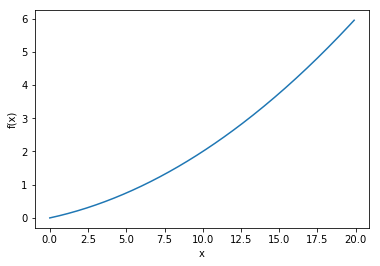

In [12]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 0 から 20 まで、0.1 刻みの x 配列 
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [13]:
numerical_diff(function_1, 5)

0.1999999999990898

In [14]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


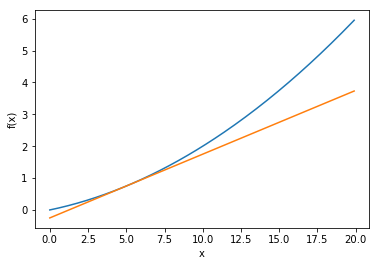

In [15]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 偏微分

In [16]:
def function_2(x):
    return x[0]**2 + x[1]**2
# または return np.sum(x**2)

#### exersize
1. x0 = 3、x1 = 4 のときの x0 に対する偏微分を求めよ
1. x0 = 3、x1 = 4 のときの x1 に対する偏微分を求めよ

In [17]:
# 1
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [18]:
# 2
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 勾配

In [19]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x と同じ形状の配列を生成
    
    for idx in range(x.size): 
        tmp_val = x[idx]
        # f(x+h) の計算
        x[idx] = tmp_val + h 
        fxh1 = f(x)
        
        # f(x-h) の計算 
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) 
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

In [20]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [21]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [22]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

/Users/TO/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


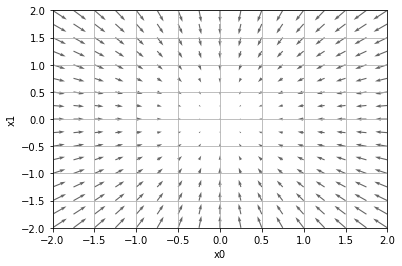

In [23]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

### 勾配降下法

In [24]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x  = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [25]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [26]:
# 学習率が大きすぎる例:lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [27]:
# 学習率が小さすぎる例:lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

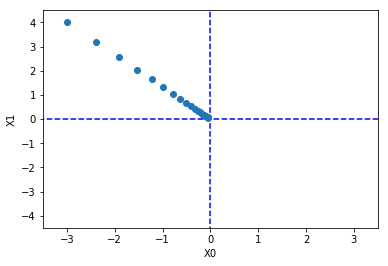

In [59]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from ch04.gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### ニューラルネットワークに対する勾配

In [60]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化 
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [61]:
net = simpleNet()
net.W

array([[ 0.76137946, -0.67956323, -0.70818487],
       [-0.15971728,  0.16812672, -1.38430599]])

In [31]:
x = np.array([0.6, 0.9])
net.predict(x)

array([-1.07348331, -1.23757653,  1.16424221])

In [32]:
t = np.array([0, 0, 1]) # 正解ラベル 
net.loss(x, t)

0.18003050544421226

In [33]:
def f(w):
    return net.loss(x, t)

numerical_gradient(f, net.W)

array([[ 0.05347282,  0.04538039, -0.09885321],
       [ 0.08020922,  0.06807059, -0.14827981]])

In [34]:
# これも可
f = lambda w: net.loss(x, t)
numerical_gradient(f, net.W) 

array([[ 0.05347282,  0.04538039, -0.09885321],
       [ 0.08020922,  0.06807059, -0.14827981]])

### 2層ニューラルネットワークのクラス

In [67]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [68]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10,)

(10,)

In [71]:
x = np.random.rand(100, 784) # ダミーの入力データ(100 枚分) 
y = net.predict(x) 
y

array([[ 0.09260283,  0.09609445,  0.09794626,  0.1074392 ,  0.09328033,
         0.10245671,  0.09957867,  0.10313331,  0.11225554,  0.09521271],
       [ 0.09225887,  0.09589697,  0.09832332,  0.10742313,  0.0931989 ,
         0.1028384 ,  0.09957739,  0.10282788,  0.11255736,  0.09509778],
       [ 0.09288318,  0.09582096,  0.09789821,  0.10763835,  0.09314212,
         0.10256811,  0.09941103,  0.10299763,  0.11253563,  0.09510479],
       [ 0.09260789,  0.09580814,  0.0983959 ,  0.10747283,  0.09338488,
         0.10296292,  0.0995078 ,  0.10279607,  0.11214396,  0.09491961],
       [ 0.09265447,  0.09595607,  0.09827556,  0.10735234,  0.09329472,
         0.10281008,  0.0994199 ,  0.10301476,  0.11209856,  0.09512353],
       [ 0.09240374,  0.09608734,  0.09812507,  0.10754527,  0.09320526,
         0.10288759,  0.09952137,  0.10276706,  0.11231512,  0.09514221],
       [ 0.09273496,  0.09601976,  0.09818864,  0.10771393,  0.09281762,
         0.10234425,  0.09954155,  0.10282582

In [70]:
t = np.random.rand(100, 10) # ダミーの正解ラベル(100 枚分)
grads = net.gradient(x, t) # 勾配を計算
grads

{'W1': array([[  4.71589019e-04,   7.45221169e-05,   1.45779388e-03, ...,
          -1.38220465e-03,  -5.17576436e-04,  -2.51008656e-03],
        [  5.59025808e-04,   5.97406136e-05,   1.83257976e-03, ...,
          -1.63668188e-03,  -6.52704685e-04,  -2.85119642e-03],
        [  6.80549912e-04,   1.96075803e-04,   1.53759969e-03, ...,
          -1.53334394e-03,  -5.33414794e-04,  -2.57372555e-03],
        ..., 
        [  6.66365124e-04,   8.81338367e-05,   1.51195444e-03, ...,
          -1.59829475e-03,  -4.94826616e-04,  -2.62414126e-03],
        [  6.29301199e-04,   6.23045346e-05,   1.80051878e-03, ...,
          -1.76668861e-03,  -6.06702072e-04,  -2.97982123e-03],
        [  5.80956979e-04,   1.53386349e-04,   1.69885469e-03, ...,
          -1.64871948e-03,  -5.98351811e-04,  -3.10961409e-03]]),
 'W2': array([[-0.16666468, -0.17692486, -0.15885248, -0.18132497, -0.20466229,
         -0.1857591 , -0.19570629, -0.18011445, -0.17015397, -0.17800647],
        [-0.17697478, -0.188545

### ミニバッチ学習の実装

In [76]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0] 
batch_size = 100 
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num): 
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch) 
    grad = network.gradient(x_batch, t_batch) # 高速版!

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 学習経過の記録
    loss = network.loss(x_batch, t_batch) 
    train_loss_list.append(loss)

### テストデータで評価

In [50]:
import numpy as np
from dataset.mnist import load_mnist 
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1 エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

# ハイパーパラメータ 
iters_num = 10000 
batch_size = 100 
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num): 
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size) 
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch) 
    grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch) 
    train_loss_list.append(loss)
    
    # 1エポックごとに認識精度を計算 
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train) 
        test_acc = network.accuracy(x_test, t_test) 
        train_acc_list.append(train_acc) 
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.772166666667, 0.7771
train acc, test acc | 0.877766666667, 0.8815
train acc, test acc | 0.898033333333, 0.9017
train acc, test acc | 0.908366666667, 0.9103
train acc, test acc | 0.91385, 0.9159
train acc, test acc | 0.918216666667, 0.9216
train acc, test acc | 0.923466666667, 0.926
train acc, test acc | 0.927216666667, 0.9287
train acc, test acc | 0.929816666667, 0.9301
train acc, test acc | 0.9329, 0.9328
train acc, test acc | 0.936333333333, 0.9371
train acc, test acc | 0.93805, 0.9384
train acc, test acc | 0.94085, 0.9405
train acc, test acc | 0.9426, 0.9413
train acc, test acc | 0.945016666667, 0.9441
train acc, test acc | 0.946933333333, 0.9444


train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.8022, 0.8027
train acc, test acc | 0.877383333333, 0.8806
train acc, test acc | 0.89765, 0.8999
train acc, test acc | 0.90825, 0.91
train acc, test acc | 0.914583333333, 0.915
train acc, test acc | 0.9206, 0.9226
train acc, test acc | 0.924933333333, 0.9241
train acc, test acc | 0.92925, 0.9288
train acc, test acc | 0.933083333333, 0.9331
train acc, test acc | 0.935716666667, 0.9347
train acc, test acc | 0.938833333333, 0.9384
train acc, test acc | 0.941666666667, 0.9408
train acc, test acc | 0.943816666667, 0.9415
train acc, test acc | 0.94615, 0.9441
train acc, test acc | 0.94805, 0.9451
train acc, test acc | 0.9495, 0.9477


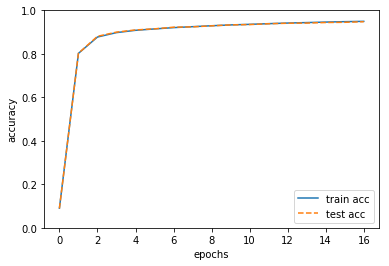

In [52]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()